In [1]:
%load_ext autoreload
%autoreload 2

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pylab import savefig
from mpl_toolkits.mplot3d import Axes3D

from termcolor import colored
from statistics import print_p
from statistics import t_test_kruskal
from statistics import t_test_levene
from statistics import print_p

import my_plots

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [2, 2],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [3]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

def cut_df(df):
    df = df.drop(df[df['vrpn_client_node_cf1_pose__pose_position_y'] > 2.2].index)
    df = df.drop(df[df['vrpn_client_node_cf1_pose__pose_position_x'] > 2.3].index)
#     print(df['vrpn_client_node_cf1_pose__pose_position_y'])
    return df

def dfFromCSV(file):
    df = pd.read_csv(file)

    df = df.drop(['Unnamed: 0', 'rosout__file', 'rosout__function', 'rosout__level', 'rosout__line', 'rosout__msg', 'rosout__name', 'rosout_agg__line', 'rosout_agg__msg', 'rosout_agg__name', 'rosout_agg__file', 'rosout_agg__function', 'rosout_agg__level'], axis=1)
    df = df.interpolate()
    df = df.iloc[::20, :]
    df = df.dropna()
    return df

In [4]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

# Import data

In [5]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/"
subjects = glob.glob(path_to_folder + "*/*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub0/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub0/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub1/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub1/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub2/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub2/remote/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub4/motion/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub4/remote/']

### used to remove outliers

In [6]:
# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []

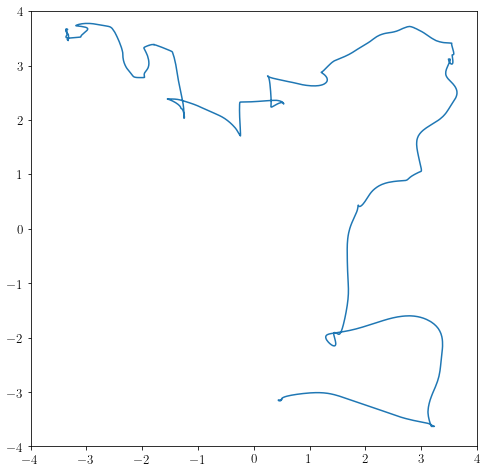

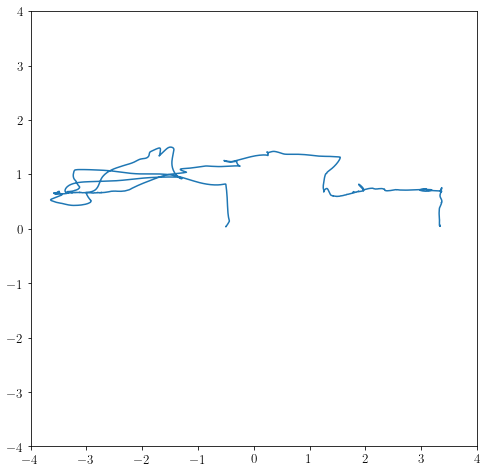

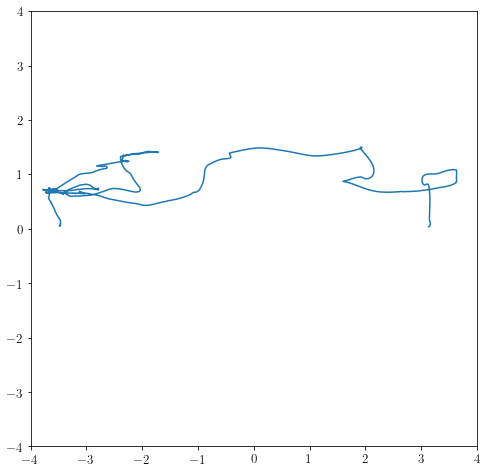

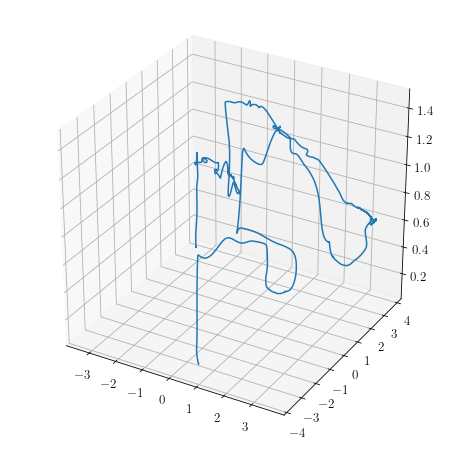

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

file = '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/rosbags/learning/sub4/motion/2019-08-22-12-45-21.csv'

log = dfFromCSV(file)

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1, 1, 1)
ax.plot(-log['vrpn_client_node_cf1_pose__pose_position_x'],-log['vrpn_client_node_cf1_pose__pose_position_y'])
plt.xlim(-4,4)
plt.ylim(-4,4)

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1, 1, 1)
ax.plot(log['vrpn_client_node_cf1_pose__pose_position_x'],log['vrpn_client_node_cf1_pose__pose_position_z'])
plt.xlim(-4,4)
plt.ylim(-4,4)

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1, 1, 1)
ax.plot(log['vrpn_client_node_cf1_pose__pose_position_y'],log['vrpn_client_node_cf1_pose__pose_position_z'])
plt.xlim(-4,4)
plt.ylim(-4,4)

fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot(-log['vrpn_client_node_cf1_pose__pose_position_x'],-log['vrpn_client_node_cf1_pose__pose_position_y'],log['vrpn_client_node_cf1_pose__pose_position_z'])
# for idx,i in enumerate(log['vrpn_client_node_cf1_pose__pose_position_x']):
#     ax.plot(log['vrpn_client_node_cf1_pose__pose_position_x'],log['vrpn_client_node_cf1_pose__pose_position_y'],log['vrpn_client_node_cf1_pose__pose_position_z'])
#     plt.show()

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print('new subject')
    files = glob.glob(subject+"*.csv")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print(subject)
        print('wrong number of experiments!')
        break
    for file in files:
        print('.')
        logs[subject].append(dfFromCSV(file))

new subject
.
.


/Users/lis/anaconda3/envs/bidir/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (1,2,5,6,7,8,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.
new subject
.
.
.
.
.


In [9]:
fields = ['first remote', 'last remote', 'first motion', 'last motion']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

### bugfix in data

In [10]:
logs['first motion'][1] = logs['first motion'][1].iloc[:3800]

IndexError: list index out of range

# Data analysis scripts

In [ ]:
def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print ()
                print (i,j)
                print ('Kruskal')
                print_p(p)
                
                t, p = t_test_levene(var[i],var[j])
                print ('Levene')
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print_p(p)
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print_p(p)
            
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    lighter = 0.4
    c0 = [0,0,1] 
    c1 = [lighter,lighter,1] 
    c2 = [1,0,0] 
    c3 = [1,lighter,lighter]    

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[2]], [1.8], col[2], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[3]], [2.2], col[3], whis = whis)
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4, 1.8, 2.2], ['R1', 'R5', 'M1', 'M5'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [ ]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

# Plot Trajectories

In [ ]:
mpl.rcParams.update(params)

plt.figure(figsize = [10, 10])

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['vrpn_client_node_cf1_pose__pose_position_x'],-log['vrpn_client_node_cf1_pose__pose_position_y'],log['vrpn_client_node_cf1_pose__pose_position_z'], label = str(idx1))
    plt.legend()
    plt.title(fields[idx])

# Time analysis

In [ ]:
def compTime(df):
    return df['dt'].index[-1] - df['dt'].index[0]
time = runBasicAnalysis(compTime)
basic_plot(time)

basic_box(time, fields, y = 'Time [s]', save = True, where = 'Time_HW.pdf')

## <span style="color:red">???</span>.

# Distance Analysis

In [ ]:
def compDist(df):
    
    steps = 1
    
    df['vrpn_client_node_cf1_pose_position_Filtered_x'] = running_average(df['vrpn_client_node_cf1_pose__pose_position_x'].values, steps)
    df['vrpn_client_node_cf1_pose_position_Filtered_y'] = running_average(df['vrpn_client_node_cf1_pose__pose_position_y'].values, steps)
    df['vrpn_client_node_cf1_pose_position_Filtered_z'] = running_average(df['vrpn_client_node_cf1_pose__pose_position_z'].values, steps)
    
    x = df['vrpn_client_node_cf1_pose_position_Filtered_x'].values
    y = df['vrpn_client_node_cf1_pose_position_Filtered_y'].values
    z = df['vrpn_client_node_cf1_pose_position_Filtered_z'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    dd = np.sqrt(dx**2+dy**2+dz**2)
    d = np.sum(dd)

    return d

dist = runBasicAnalysis(compDist)

ax = basic_box(dist, fields, y = 'Distance [m]', ylim = [10, 40], save = True, where = 'Distance_HW.pdf', whis = 3)

## <span style="color:red">Distance is signficatively lower in the first run for the motion controller, than compensated with time</span>.

# Velocity Analysis

In [ ]:
def compVel(df):
    x = df['vrpn_client_node_cf1_pose_position_Filtered_x'].values
    y = df['vrpn_client_node_cf1_pose_position_Filtered_y'].values
    z = df['vrpn_client_node_cf1_pose_position_Filtered_z'].values
    t = df['dt'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    dt = np.diff(t)
    
    vx = np.append([0],dx/dt)
    vy = np.append([0],dy/dt)
    vz = np.append([0],dz/dt)
    
    df['droneVelocity.x'] = vx
    df['droneVelocity.y'] = vy
    df['droneVelocity.z'] = vz
    
    steps = 200    
    
    df['droneVelocityFiltered.x'] = running_average(df['droneVelocity.x'], steps)
    df['droneVelocityFiltered.y'] = running_average(df['droneVelocity.y'], steps)
    df['droneVelocityFiltered.z'] = running_average(df['droneVelocity.z'], steps)

    dv = np.sqrt(df['droneVelocityFiltered.x'][100:]**2+df['droneVelocityFiltered.y'][100:]**2+df['droneVelocityFiltered.z'][100:]**2)
    
    dv[dv>1] = 1
#     plt.figure(figsize = [10,10])
    plt.plot(dv)
    
    v = np.mean(dv)
    
    return v

vel = runBasicAnalysis(compVel)
basic_plot(vel)

# Acceleration Analysis

In [ ]:
def compAcc(df):
    vx = df['droneVelocityFiltered.x'].values
    vy = df['droneVelocityFiltered.y'].values
    vz = df['droneVelocityFiltered.z'].values
    t = df['dt'].values
    
    dvx = np.diff(vx)
    dvy = np.diff(vy)
    dvz = np.diff(vz)
    dt = np.diff(t)
    
    ax = np.append([0],dvx/dt)
    ay = np.append([0],dvy/dt)
    az = np.append([0],dvz/dt)
    
    df['droneAcceleration.x'] = ax
    df['droneAcceleration.y'] = ay
    df['droneAcceleration.z'] = az
    
    steps = 200    
    
    df['droneAccelerationFiltered.x'] = running_average(df['droneAcceleration.x'], steps)
    df['droneAccelerationFiltered.y'] = running_average(df['droneAcceleration.y'], steps)
    df['droneAccelerationFiltered.z'] = running_average(df['droneAcceleration.z'], steps)
    

    da = np.sqrt(df['droneAccelerationFiltered.x'][100:]**2+df['droneAccelerationFiltered.y'][100:]**2+df['droneAccelerationFiltered.z'][100:]**2)
    
    da[da>1] = 1
    
    plt.plot(da)
    
    a = np.mean(da)

    return a

acc = runBasicAnalysis(compAcc)
basic_plot(acc)

# Jerk Analysis

In [ ]:
def compJerk(df):
    ax = df['droneAccelerationFiltered.x'].values
    ay = df['droneAccelerationFiltered.y'].values
    az = df['droneAccelerationFiltered.z'].values
    t = df['dt'].values
    
    dax = np.diff(ax)
    day = np.diff(ay)
    daz = np.diff(az)
    dt = np.diff(t)
    
    jx = np.append([0],dax/dt)
    jy = np.append([0],day/dt)
    jz = np.append([0],daz/dt)
    
    df['droneJerk.x'] = jx
    df['droneJerk.y'] = jy
    df['droneJerk.z'] = jz
    
    steps = 200    
    
    df['droneJerkFiltered.x'] = running_average(df['droneJerk.x'], steps)
    df['droneJerkFiltered.y'] = running_average(df['droneJerk.y'], steps)
    df['droneJerkFiltered.z'] = running_average(df['droneJerk.z'], steps)

    dj = np.sqrt(df['droneJerkFiltered.x'][100:]**2+df['droneJerkFiltered.y'][100:]**2+df['droneJerkFiltered.z'][100:]**2)
    
    dj[dj>1] = 1
    
    plt.plot(dj)
    
    j = np.mean(dj)

    return j

jerk = runBasicAnalysis(compJerk)
basic_plot(jerk)

# Energy Analysis

In [ ]:
def compEnergy(df):
    df['controlInput'] = np.sqrt(df['controlSpeed.x']**2+df['controlSpeed.y']**2+df['controlSpeed.z']**2)
    return df['controlInput'].sum()

energy = runBasicAnalysis(compEnergy)
basic_plot(energy)

for i in energy:
    energy[i] = np.array(energy[i])/1000

basic_box(energy, fields, y = 'IAU', ylim = [.8,3.500], save = True, where = 'IAU.pdf', whis = 3)

## <span style="color:red">Energy is signficantly lower in the first run for the motion controller, than compensated with time</span>.

# Collision Analysis

In [ ]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA//Bidir - learning collisions - HW - Sheet1.csv')

In [ ]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]

In [ ]:
def compute_mean_std_collisions(data_m, data_r):
    mean_m = data_m['Collisions'].mean()
    std_m = data_m['Collisions'].std()
    mean_r = data_r['Collisions'].mean()
    std_r = data_r['Collisions'].std()

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', data_m['Collisions'].sum())
    print('total remote = ', data_r['Collisions'].sum())
    print('')

    t, p = t_test_kruskal(data_m['Collisions'],data_r['Collisions'])

    print_p(p)
    t, p = t_test_levene(data_m['Collisions'],data_r['Collisions'])
    print_p(p)
    
print('')
print('consider all runs')
print('')
compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
compute_mean_std_collisions(coll['last motion'], coll['last remote'])

t, p = t_test_kruskal(coll['first remote']['Collisions'],coll['last remote']['Collisions'])

print('')
print('FIRST LAST REMOTE')
print('')
print_p(p)
t, p = t_test_levene(coll['first remote']['Collisions'],coll['last remote']['Collisions'])
print_p(p)


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [coll['motion']['Collisions'].sum(), coll['remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 60])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [coll['first motion']['Collisions'].sum(), coll['first remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 20])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [coll['last motion']['Collisions'].sum(), coll['last remote']['Collisions'].sum()])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 20])
plt.title('Total collisions')
plt.title('Collisions - last run')